In [34]:
import pandas as pd # data manipulation
import numpy as np  # fast computation for arrays
from matplotlib import pyplot as plt # basic plotting
import seaborn as sns # advanced plotting

In [35]:
# READ THE DATA
data = pd.read_csv('predicting-a-pulsar-star//pulsar_stars.csv')
data.head() # look at the first 5 lines of the data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [36]:
data.info() # dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [37]:
data.describe() # basic statistics

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


<Figure size 720x432 with 0 Axes>

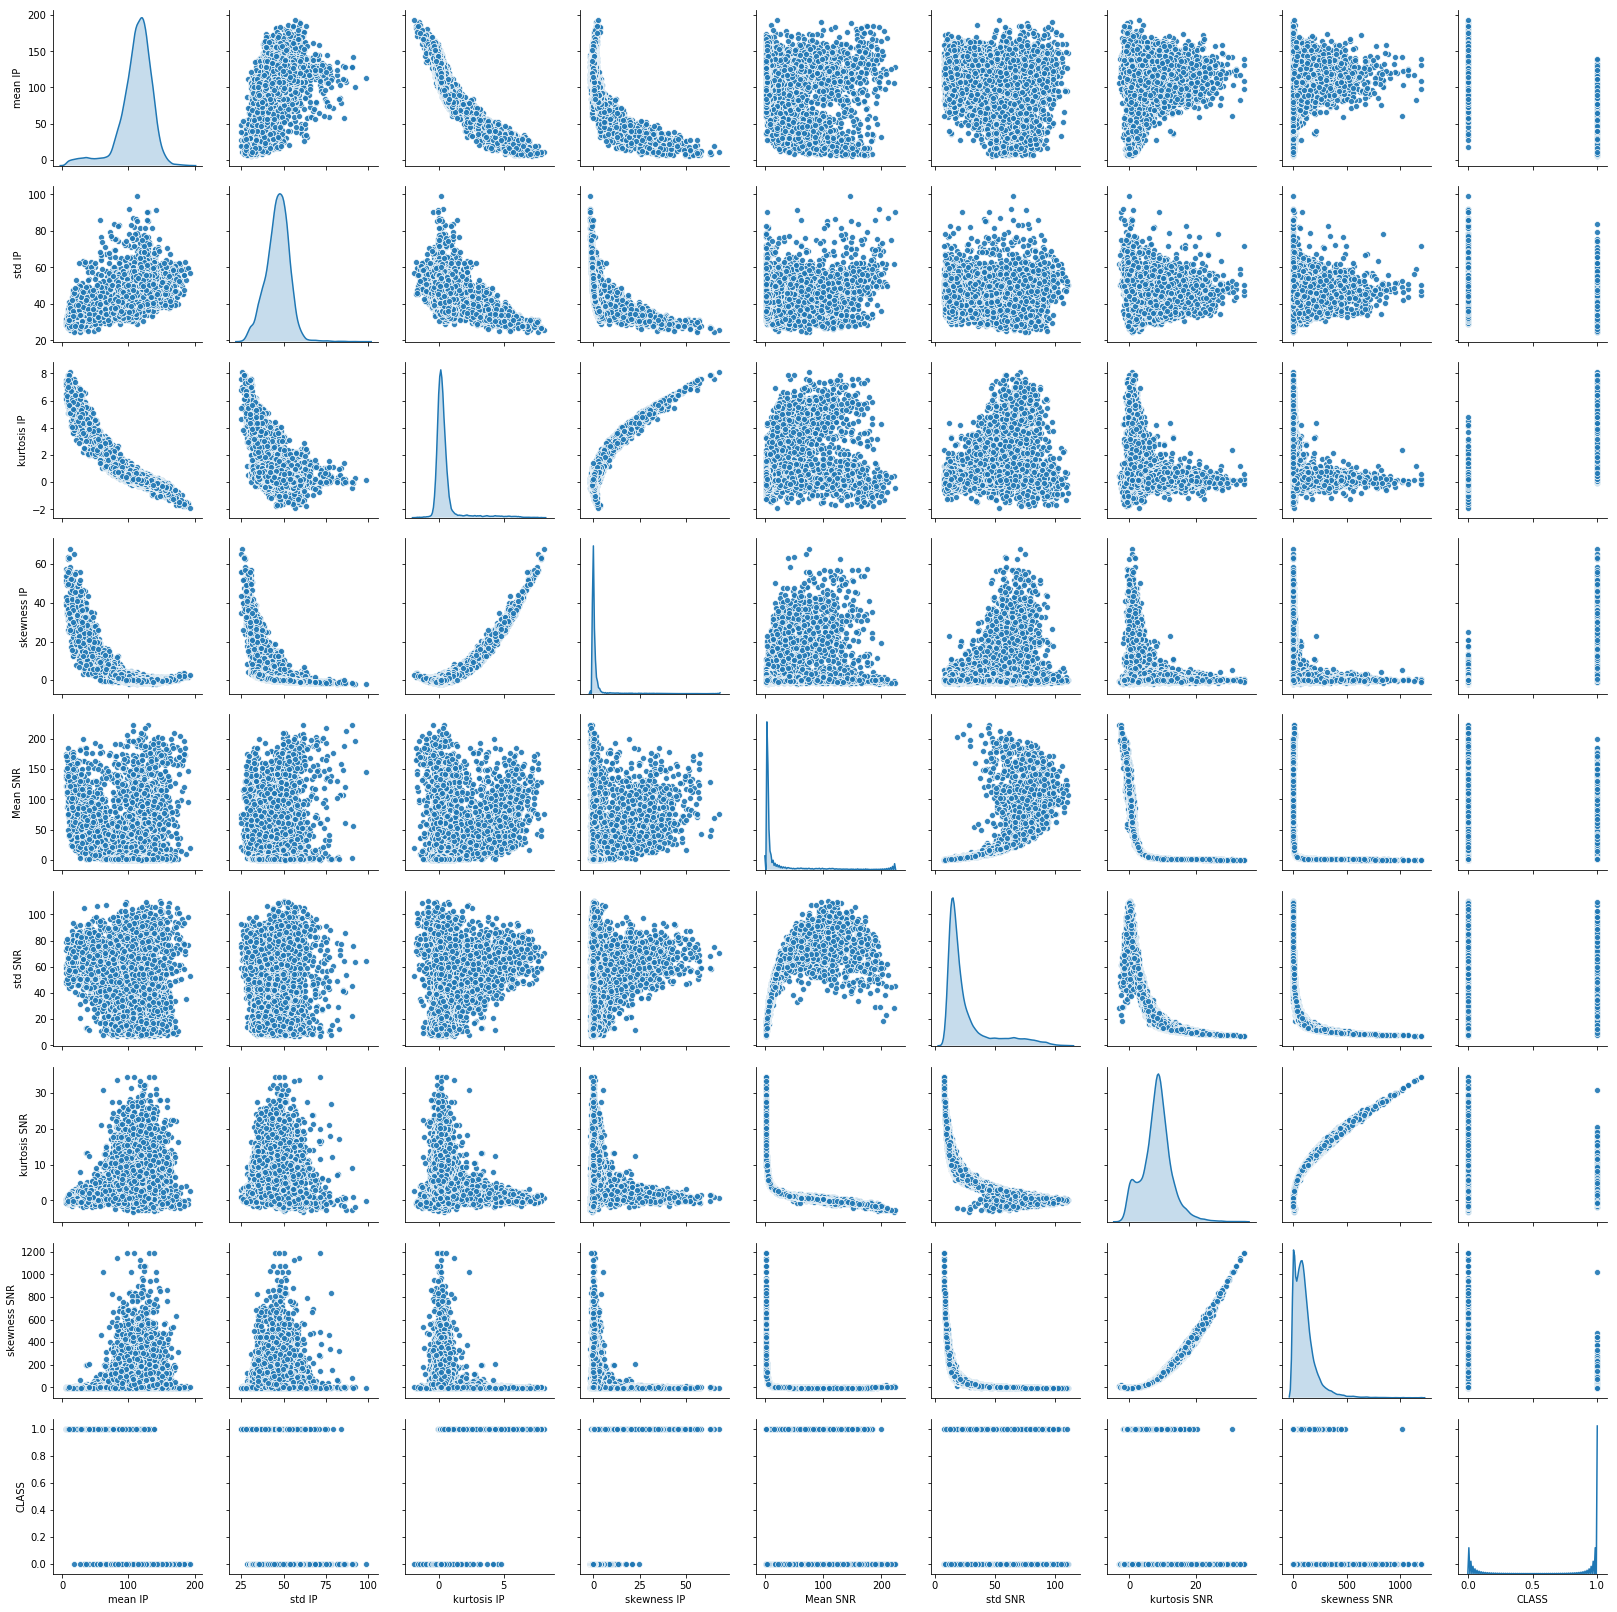

In [38]:
# shorten the names of the variables
data.columns = ["mean IP", "std IP", "kurtosis IP", "skewness IP", "Mean SNR", "std SNR", "kurtosis SNR", "skewness SNR", "CLASS"]
# SCATTER PLOTS BETWEEN THE VARIABLES AND DISTRIBUTIONS
plt.figure(figsize=(10, 6))
sns.pairplot(data, diag_kind = 'kde', plot_kws=dict(alpha = 0.9),diag_kws=dict(shade=True))

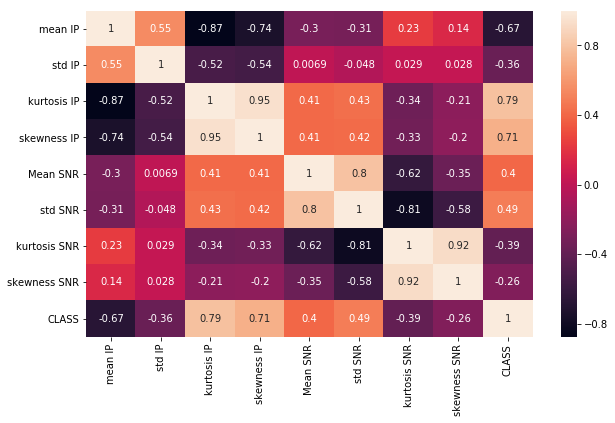

In [39]:
# CORRELATION HEATMAP
correlations = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True)

0    16259
1     1639
Name: CLASS, dtype: int64

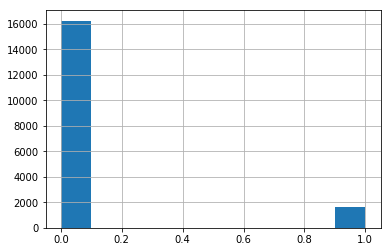

In [40]:
# TARGET VARIABLE HISTOGRAM
data['CLASS'].hist()
data['CLASS'].value_counts()

1    1639
0    1639
Name: CLASS, dtype: int64

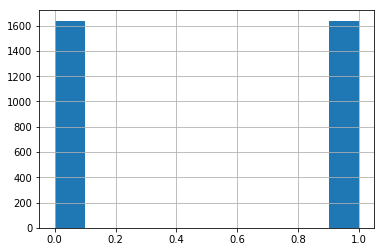

In [41]:
# BALANCING CLASSES
data2 = data
for i in range(data.shape[0]):
    if data['CLASS'][i] == 0:
        data2 = data2.drop([i], axis=0)
    if data2.shape[0] == 2*1639:
        break
data2['CLASS'].hist()
data2['CLASS'].value_counts()

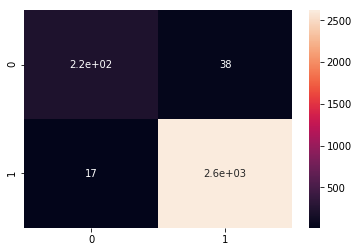

In [42]:
'''-------------------------------------UNBALANCED DATASET------------------------------------'''
# NEURAL NETWORK LIBRARIES
import tensorflow
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential

# PREPROCESSING FUNCTIONS
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
#class_weight = {0 : 1., 1 : 3.} if data is unballanced this might help

# PREPROCESSING
scaler = MinMaxScaler(feature_range=(0,1))

X = data.drop(['CLASS'], axis=1)
X = scaler.fit_transform(X)
y = data['CLASS']

X, y = shuffle(X, y)
x = X[15000:]
X = X[:15000]
Y = y[15000:]
y = y[:15000]

# CREATE MODEL ARCHITECTURE
model = Sequential()
model.add(Dense(16, activation = 'relu', input_shape=(8,)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer=Adam(lr=0.02),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# TRAIN THE MODEL
history1 = model.fit(np.array(X), np.array(y), epochs=100, batch_size=128, validation_split = 0.3, verbose = 0)#, class_weight = class_weight)

# USE THE MODEL TO PREDICT
y_pred = model.predict(x)

# DISCRETIZE THE PREDICTIONS
y_pred = y_pred.reshape(len(y_pred))
for i in range(len(y_pred)):
    if y_pred[i]<=0.5: y_pred[i] = 0
    else:              y_pred[i] = 1

# CREATE CONFUSION MATRIX        
sns.heatmap(confusion_matrix(np.array(Y), y_pred,labels = np.array([1,0])),annot=True)
plt.show()

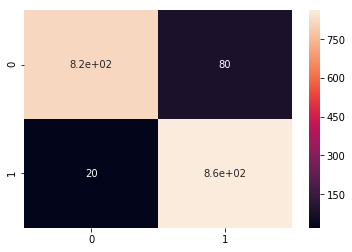

In [43]:
'''-------------------------------------BALANCED DATASET------------------------------------'''

# NEURAL NETWORK LIBRARIES
import tensorflow
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential

# PREPROCESSING FUNCTIONS
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

# PREPROCESSING
scaler = MinMaxScaler(feature_range=(0,1))
data3 = shuffle(data2)
X = data3.drop(['CLASS'], axis=1)
X = scaler.fit_transform(X)
y = data3['CLASS']

# TRAIN - TEST SPLIT
x = X[1500:]
X = X[:1500]
Y = y[1500:]
y = y[:1500]

# CREATE MODEL
model = Sequential()
model.add(Dense(16, input_shape=(8,)))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# TRAIN THE MODEL
history2 = model.fit(np.array(X), np.array(y), epochs=100, batch_size=128, validation_split = 0.3, verbose=0)

# USE THE MODEL TO PREDICT
y_pred = model.predict(x)

# DISCRETIZE THE PREDICTIONS
y_pred = y_pred.reshape(len(y_pred))
for i in range(len(y_pred)):
    if y_pred[i]<=0.5: y_pred[i] = 0
    else:              y_pred[i] = 1

# CREATE CONFUSION MATRIX        
sns.heatmap(confusion_matrix(np.array(Y), y_pred,labels = np.array([1,0])),annot=True)
plt.show()

In [44]:
# COPIED FUNCTION FROM TENSORFLOW.DOCS
import matplotlib.pyplot as plt
prop_cycle = plt.rcParams['axes.prop_cycle']
COLOR_CYCLE = prop_cycle.by_key()['color']

def _smooth(values, std):
    
    width = std * 4
    x = np.linspace(-width, width, 2 * width + 1)
    kernel = np.exp(-(x / 5)**2)

    values = np.array(values)
    weights = np.ones_like(values)

    smoothed_values = np.convolve(values, kernel, mode='same')
    smoothed_weights = np.convolve(weights, kernel, mode='same')

    return smoothed_values / smoothed_weights


class HistoryPlotter(object):
   

    def __init__(self, metric=None, smoothing_std=None):
        self.color_table = {}
        self.metric = metric
        self.smoothing_std = smoothing_std

    def plot(self, histories, metric=None, smoothing_std=None):
    
        if metric is None:
            metric = self.metric
        if smoothing_std is None:
            smoothing_std = self.smoothing_std

        for name, history in histories.items():
          # Remember name->color asociations.
            if name in self.color_table:
                color = self.color_table[name]
            else:
                color = COLOR_CYCLE[len(self.color_table) % len(COLOR_CYCLE)]
                self.color_table[name] = color
            train_value = history.history[metric]
            val_value = history.history['val_' + metric]
            if smoothing_std is not None:
                train_value = _smooth(train_value, std=smoothing_std)
                val_value = _smooth(val_value, std=smoothing_std)

            plt.plot(
              history.epoch,
              train_value,
              color=color,
              label=name.title() + ' Train')
            plt.plot(
              history.epoch,
              val_value,
              '--',
              label=name.title() + ' Val',
              color=color)

        plt.xlabel('Epochs')
        plt.ylabel(metric.replace('_', ' ').title())
        plt.legend()

        plt.xlim(
            [0, max([history.epoch[-1] for name, history in histories.items()])])
        plt.grid(True)

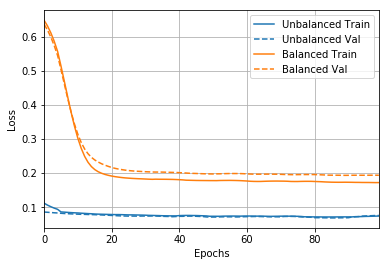

In [45]:
# PLOT THE LOSS OF THE TRAIN-VALIDATION DATASETS
plotter = HistoryPlotter(metric = 'loss', smoothing_std=1)
plotter.plot({"unbalanced":history1, "balanced":history2})

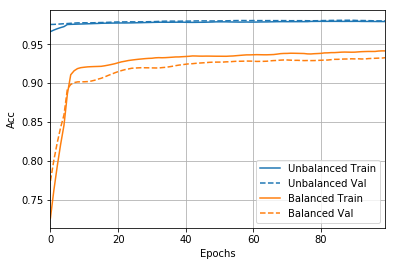

In [46]:
# PLOT THE ACCURACY OF THE TRAIN-VALIDATION DATASETS
plotter = HistoryPlotter(metric = 'acc', smoothing_std=1)
plotter.plot({"unbalanced":history1, "balanced":history2})